我们使用UCI Machine Learning Repository中的玻璃类型识别数据集（[Glass Identification Data Set](http://archive.ics.uci.edu/ml/datasets/Glass+Identification)）。

# Part 1: 预测连续值

In [1]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values(by='al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


假设我们现在希望用‘al’来预测‘ri’的值，我们可以构建一个线性回归模型做预测。

我们先可视化一下它们之间可能的线性关系

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

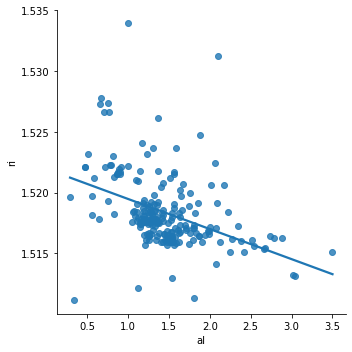

In [4]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

其他两种可视化的方法：

<AxesSubplot:xlabel='al', ylabel='ri'>

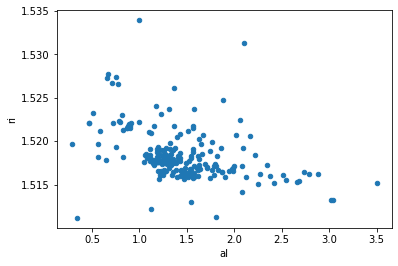

In [5]:
# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

Text(0, 0.5, 'ri')

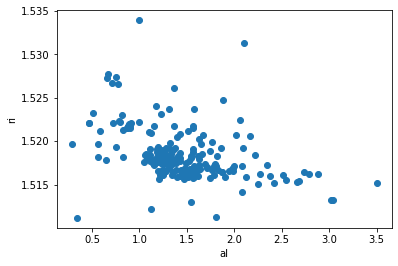

In [6]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [8]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]

y = glass['ri']

linreg.fit(X, y)

LinearRegression()

In [9]:
# make predictions for all values of X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


Text(0, 0.5, 'Predicted ri')

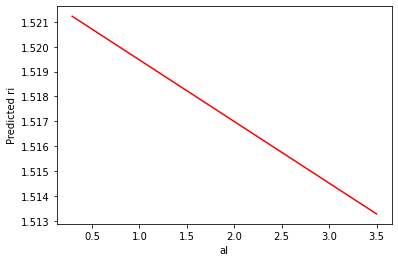

In [10]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

Text(0, 0.5, 'ri')

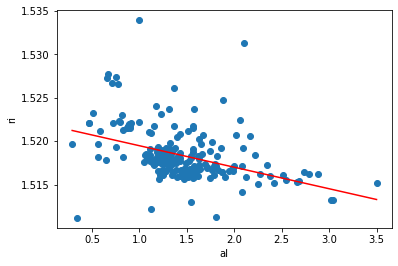

In [11]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

In [12]:
# examine coefficient for al
list(zip(feature_cols, linreg.coef_))

[('al', -0.0024776063874696274)]

# Part 2: 预测类别值

In [13]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [14]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


假设我们现在希望用‘al’来预测‘household’

先来可视化一下两者的关系

Text(0, 0.5, 'household')

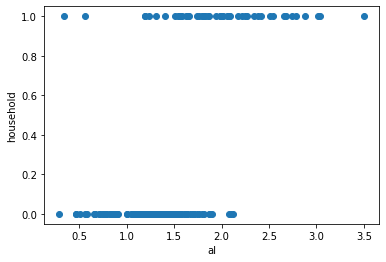

In [15]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [17]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

feature_cols = ['al']
X = glass[feature_cols]

y = glass.household

logreg.fit(X, y)

glass['household_pred_class'] = logreg.predict(X)

In [18]:
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred_class
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,0
184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6,1.520558,1,0
110,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.00,2,1.520558,0,0
158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3,1.520508,0,0
153,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.0,0.00,3,1.520335,0,0


Text(0, 0.5, 'household')

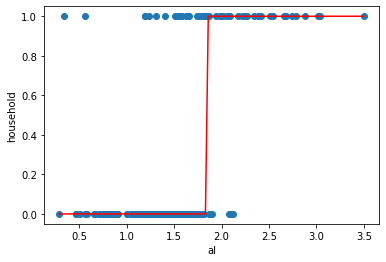

In [19]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

我们也可以得到模型预测类别的概率，而不仅仅是最终的类别

In [20]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [21]:
logreg.predict_proba(X)

array([[9.98500735e-01, 1.49926520e-03],
       [9.98152844e-01, 1.84715630e-03],
       [9.96823537e-01, 3.17646330e-03],
       [9.96823537e-01, 3.17646330e-03],
       [9.96247557e-01, 3.75244251e-03],
       [9.95379256e-01, 4.62074378e-03],
       [9.95379256e-01, 4.62074378e-03],
       [9.94978337e-01, 5.02166268e-03],
       [9.93282713e-01, 6.71728727e-03],
       [9.92997958e-01, 7.00204189e-03],
       [9.92701221e-01, 7.29877894e-03],
       [9.91384215e-01, 8.61578539e-03],
       [9.91019708e-01, 8.98029222e-03],
       [9.89831999e-01, 1.01680010e-02],
       [9.89831999e-01, 1.01680010e-02],
       [9.88955113e-01, 1.10448871e-02],
       [9.88489032e-01, 1.15109684e-02],
       [9.88003521e-01, 1.19964791e-02],
       [9.86422365e-01, 1.35776352e-02],
       [9.85850934e-01, 1.41490663e-02],
       [9.85850934e-01, 1.41490663e-02],
       [9.83318619e-01, 1.66813814e-02],
       [9.83318619e-01, 1.66813814e-02],
       [9.82618864e-01, 1.73811358e-02],
       [9.818902

In [22]:
glass.sample(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,
103,1.51820,12.62,2.76,0.83,73.81,0.35,9.42,0.0,0.20,2,1.519889,0,0,0.014149
172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.0,0.00,5,1.514413,1,1,0.993273
49,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.0,0.00,1,1.519988,0,0,0.011996
91,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22,2,1.519195,0,0,0.044220
163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.0,0.37,3,1.519691,0,0,0.019658
19,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.0,0.00,1,1.519022,0,0,0.058375
56,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.0,0.24,1,1.518749,0,0,0.089409
12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.0,0.00,1,1.518799,0,0,0.082832
137,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.0,0.12,2,1.519270,0,0,0.039213


Text(0, 0.5, 'household')

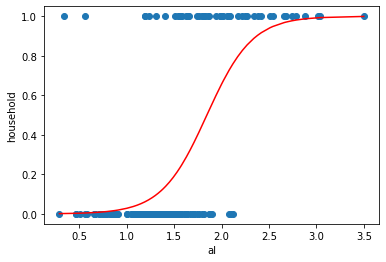

In [23]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [26]:
# examine some example predictions
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.97161741 0.02838259]]
[[0.34361466 0.65638534]]
[[0.00794181 0.99205819]]
